In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Read Dataset
---

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data for ML projects/Churn_Modelling.csv', index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(labels=['Surname'], axis=1, inplace=True)

Show dataset info
---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1015.6+ KB


In [ ]:
df.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

It`s really good!

In [ ]:
df.shape

(10000, 12)

In [ ]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

Create 2 lists with numeric columns and object-type columns

In [ ]:
num_col_lst = []
obj_col_lst = []
for col in df.columns:
  if type(df[col].loc[1]) == str:
    obj_col_lst.append(col)
  else:
    num_col_lst.append(col)

print(num_col_lst, '\n', obj_col_lst)

['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'] 
 ['Geography', 'Gender']


Visualize distributions, correlations and outliers
---

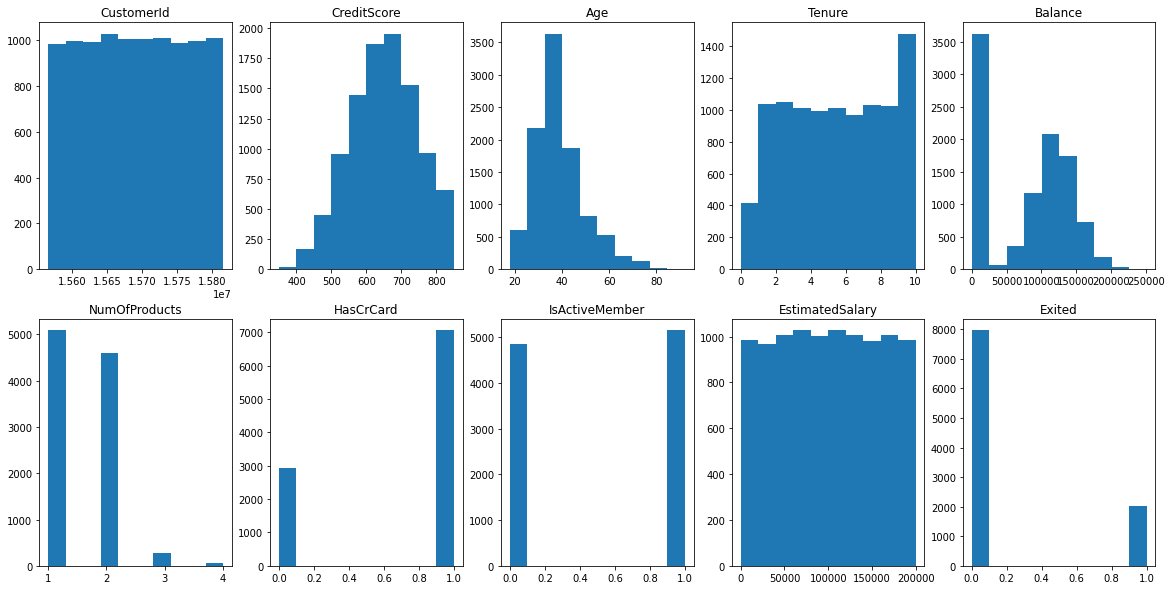

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(20,10))

for i in range(len(num_col_lst)//2):
  ax[0][i].hist(df[num_col_lst[i]])
  ax[0][i].set_title(num_col_lst[i])

for i in range(len(num_col_lst)//2):
  ax[1][i].hist(df[num_col_lst[i+5]])
  ax[1][i].set_title(num_col_lst[i+5])

There are 2 dummy features: HasCrCard and IsActiveMember, We almost haven`t not normal distribured columns except of balance, so we have to check it more attentively, and also we see disbalancing classes at our target feature

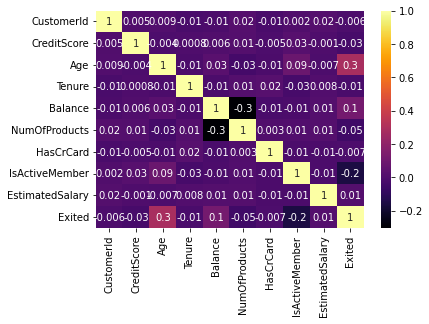

In [ ]:
sns.heatmap(df[num_col_lst].corr(), annot=True, cmap='inferno', fmt='.0g')
None

In [ ]:
df[obj_col_lst].nunique()

Geography    3
Gender       2
dtype: int64

Text(0.5, 0.98, 'Boxplots of variables')

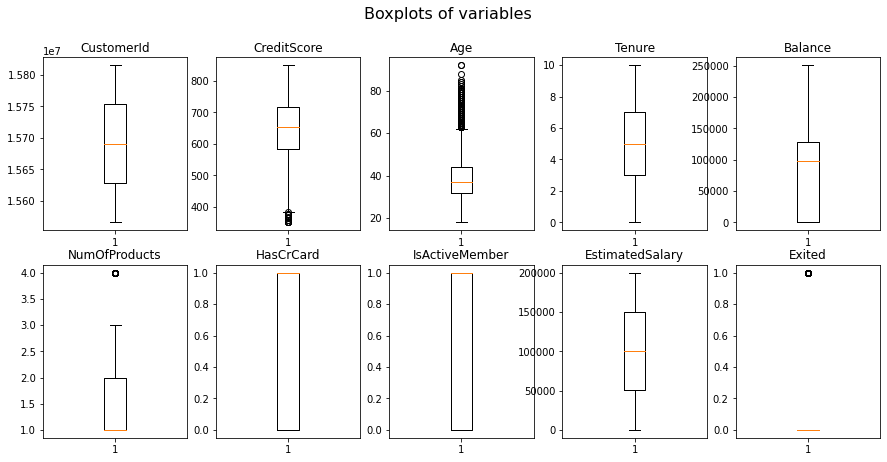

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(15,7))
for i in range(5):
  ax[0][i].boxplot(x=num_col_lst[i],
                 data=df)
  ax[0][i].set_title(num_col_lst[i])
for i in range(5):
  ax[1][i].boxplot(x=num_col_lst[i+5],
                  data=df)
  ax[1][i].set_title(num_col_lst[i+5])

fig.suptitle('Boxplots of variables', fontsize=16)

In [ ]:
df.drop(labels=['CustomerId'], axis=1, inplace=True)

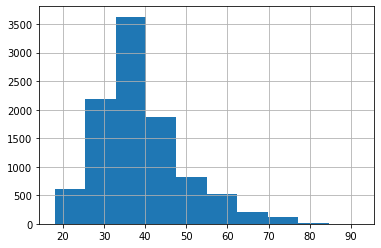

In [ ]:
df.Age.hist()

Swap outliers by average 

In [ ]:
# m = df.Age.mean()

# q1 = np.percentile(df['Age'], 25,
#                     interpolation = 'midpoint')
# q2 = np.percentile(df['Age'], 75,
#                     interpolation = 'midpoint')
# iqr = q2 - q1
# upper = q2 + 1.5*iqr
# lower = q1 - 1.5*iqr
# df.Age = df.Age.apply(
#     lambda i: m if i > upper or i < lower else i)

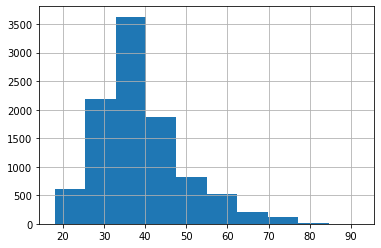

In [ ]:
df.Age.hist()

In [ ]:
new_df = pd.get_dummies(df, drop_first=True)

In [ ]:
y = new_df.Exited
X = new_df.drop(labels=['Exited'], axis = 1)

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smoted, y_smoted = oversample.fit_resample(X, y)
y_smoted = pd.Series(y_smoted)
y_smoted.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smoted, y_smoted, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

t0 = time.time()

classifier = SVC(kernel = 'poly')
classifier.fit(X_train, y_train) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

y_pred_train = classifier.predict(X_train)
self_accuracy = accuracy_score(y_train, y_pred_train)
self_precision = precision_score(y_train, y_pred_train, average='weighted')
self_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train)
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)
print("f1-score for training data", train_f1)

print()

y_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred)
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)
print("f1-score for test data", test_f1)

print()

Время обучения: 8.578508138656616

Accuracy for training data 0.5302197802197802
Precision for training data  0.5372476592277732
Recall for training data 0.5302197802197802
f1-score for training data 0.41819772528433946

Accuracy for test data: 0.5332705586942875
Precision for test data  0.5333934161406563
Recall for test data 0.5332705586942875
f1-score for test data 0.41248518372184906



In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

t0 = time.time()

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

y_pred_train = classifier.predict(X_train)
self_accuracy = accuracy_score(y_train, y_pred_train)
self_precision = precision_score(y_train, y_pred_train, average='weighted')
self_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train)
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)
print("f1-score for training data", train_f1)

print()

y_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred)
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)
print("f1-score for test data", test_f1)

print()

Время обучения: 0.026108264923095703

Accuracy for training data 0.7938775510204081
Precision for training data  0.7998223704217637
Recall for training data 0.7938775510204081
f1-score for training data 0.8087399854333577

Accuracy for test data: 0.6839296924042687
Precision for test data  0.6930688283210503
Recall for test data 0.6839296924042687
f1-score for test data 0.7058136137890738



In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

t0 = time.time()

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

y_pred_train = classifier.predict(X_train)
self_accuracy = accuracy_score(y_train, y_pred_train)
self_precision = precision_score(y_train, y_pred_train, average='weighted')
self_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train)
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)
print("f1-score for training data", train_f1)

print()

y_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred)
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)
print("f1-score for test data", test_f1)

print()

Время обучения: 0.0799405574798584

Accuracy for training data 1.0
Precision for training data  1.0
Recall for training data 1.0
f1-score for training data 1.0

Accuracy for test data: 0.7915881983678594
Precision for test data  0.7927214996945403
Recall for test data 0.7915881983678594
f1-score for test data 0.7919799498746867



f1_score:  0.88


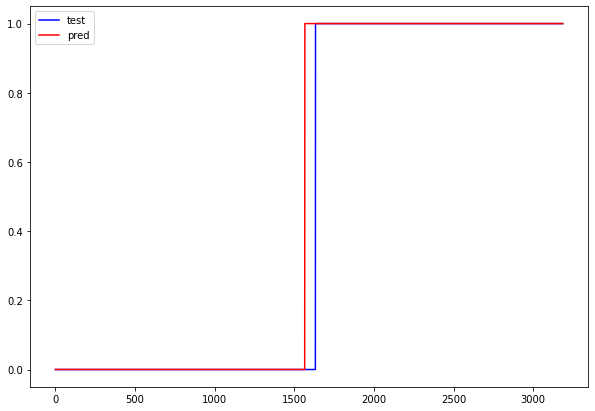

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=1000, max_depth=13, eta=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('f1_score: ', round(f1_score(y_test, y_pred), 2))
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(sorted(y_test), color="b")
ax.plot(sorted(y_pred), color="r")
ax.legend(['test', 'pred'])
None

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6, 8, 10]
        }

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1', n_jobs=-1, cv=skf.split(X_smoted,y_smoted), verbose=3, random_state=1001 )

# Here we go
random_search.fit(X_smoted, y_smoted)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f313ee07cf0>,
                   estimator=XGBClassifier(learning_rate=0.02, n_estimators=600,
                                           nthread=1, silent=True),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [6, 8, 10],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='f1', verbose=3)

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([10.86047411, 17.90993118, 17.63918336, 12.86202041, 15.1391271 ]), 'std_fit_time': array([0.08521381, 0.05869828, 1.04810266, 0.07973964, 2.34369186]), 'mean_score_time': array([0.1501464 , 0.67755612, 0.56041169, 0.36654965, 0.41780663]), 'std_score_time': array([0.00917532, 0.01604973, 0.00941475, 0.01473679, 0.04547489]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[6, 10, 10, 10, 8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
      

f1_score:  0.88


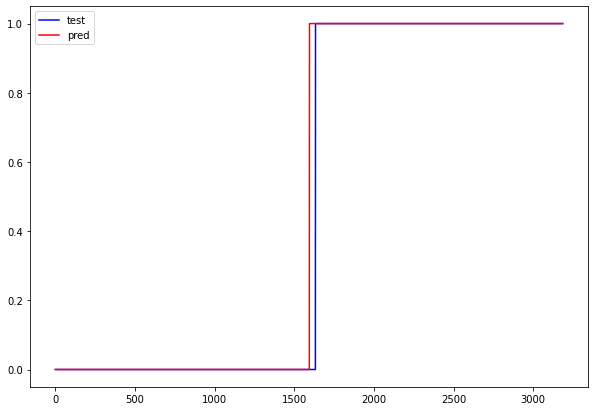

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(colsample_bytree=0.8, gamma=1.5, learning_rate=0.02, max_depth=10,
              n_estimators=600, nthread=1, silent=True, subsample=0.6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('f1_score: ', round(f1_score(y_test, y_pred), 2))
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(sorted(y_test), color="b")
ax.plot(sorted(y_pred), color="r")
ax.legend(['test', 'pred'])
None